In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
a=zipfile.ZipFile("custom_food_images.zip")
a.extractall()
a.close()

--2024-01-12 18:48:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.182.155, 142.250.195.59, 142.250.77.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.182.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: 'custom_food_images.zip'

     0K .......... .......... .......... .......... ..........  0%  130K 98s
    50K .......... .......... .......... .......... ..........  0%  180K 84s
   100K .......... .......... .......... .......... ..........  1%  590K 63s
   150K .......... .......... .......... .......... ..........  1%  717K 52s
   200K .......... .......... .......... .......... ..........  1%  589K 45s
   250K .......... .......... .......... .......... ..........  2%  690K 41s
   300K .......... .......... .......... ...

In [3]:
import tensorflow as tf
loaded_model=tf.keras.models.load_model("tuned_model.h5",compile=False)

In [13]:
def load_prep(file,scale=True):
  img=tf.io.read_file(file)
  img=tf.io.decode_image(img,channels=3)
  # we are adding attribute channels as 3 as if we use a png image this code will change the encoded PNG image into 3 color channels which we are using right now otherwise it would show error.
  img=tf.image.resize(img,[224,224])
  img=tf.expand_dims(img,axis=0)
  img=tf.cast(img,tf.float32)
  if scale:
    return img/255
  else:
    return img

In [9]:
class_names = ['apple_pie',
                'baby_back_ribs',
                'baklava',
                'beef_carpaccio',
                'beef_tartare',
                'beet_salad',
                'beignets',
                'bibimbap',
                'bread_pudding',
                'breakfast_burrito',
                'bruschetta',
                'caesar_salad',
                'cannoli',
                'caprese_salad',
                'carrot_cake',
                'ceviche',
                'cheesecake',
                'cheese_plate',
                'chicken_curry',
                'chicken_quesadilla',
                'chicken_wings',
                'chocolate_cake',
                'chocolate_mousse',
                'churros',
                'clam_chowder',
                'club_sandwich',
                'crab_cakes',
                'creme_brulee',
                'croque_madame',
                'cup_cakes',
                'deviled_eggs',
                'donuts',
                'dumplings',
                'edamame',
                'eggs_benedict',
                'escargots',
                'falafel',
                'filet_mignon',
                'fish_and_chips',
                'foie_gras',
                'french_fries',
                'french_onion_soup',
                'french_toast',
                'fried_calamari',
                'fried_rice',
                'frozen_yogurt',
                'garlic_bread',
                'gnocchi',
                'greek_salad',
                'grilled_cheese_sandwich',
                'grilled_salmon',
                'guacamole',
                'gyoza',
                'hamburger',
                'hot_and_sour_soup',
                'hot_dog',
                'huevos_rancheros',
                'hummus',
                'ice_cream',
                'lasagna',
                'lobster_bisque',
                'lobster_roll_sandwich',
                'macaroni_and_cheese',
                'macarons',
                'miso_soup',
                'mussels',
                'nachos',
                'omelette',
                'onion_rings',
                'oysters',
                'pad_thai',
                'paella',
                'pancakes',
                'panna_cotta',
                'peking_duck',
                'pho',
                'pizza',
                'pork_chop',
                'poutine',
                'prime_rib',
                'pulled_pork_sandwich',
                'ramen',
                'ravioli',
                'red_velvet_cake',
                'risotto',
                'samosa',
                'sashimi',
                'scallops',
                'seaweed_salad',
                'shrimp_and_grits',
                'spaghetti_bolognese',
                'spaghetti_carbonara',
                'spring_rolls',
                'steak',
                'strawberry_shortcake',
                'sushi',
                'tacos',
                'takoyaki',
                'tiramisu',
                'tuna_tartare',
                'waffles']

1/1 [==============================] - 0s 53ms/step


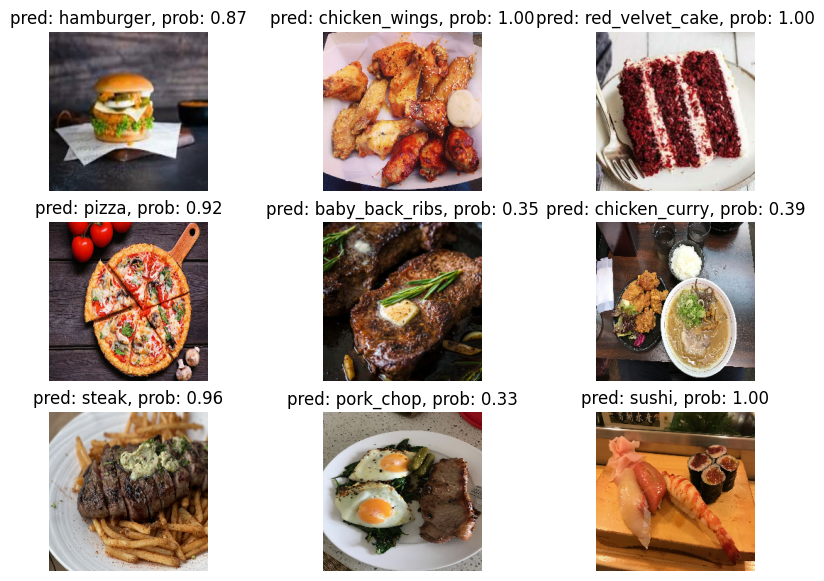

In [20]:
import matplotlib.pyplot as plt
import os
i=0
plt.figure(figsize=(10,7))
for file in os.listdir("custom_food_images"):
  img=load_prep("custom_food_images/"+file,scale=False)
  pred_prob=loaded_model.predict(img)
  pred_class=class_names[pred_prob.argmax()]
  plt.subplot(3,3,i+1)
  i+=1
  plt.imshow(tf.squeeze(img/255))
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)